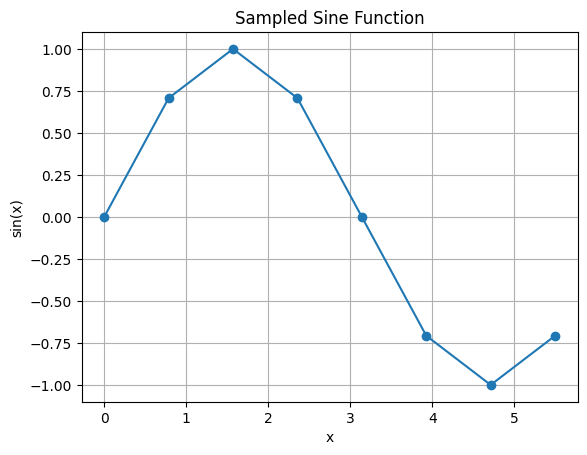

Statevector([ 0.88871646-1.38383297e-16j,  0.36811841-2.49203677e-17j,
             -0.0517767 +1.25000000e-01j, -0.0517767 -1.25000000e-01j,
              0.05006798+6.17381424e-03j, -0.12670872+2.07388351e-02j,
             -0.12670872-2.07388351e-02j,  0.05006798-6.17381424e-03j],
            dims=(2, 2, 2))


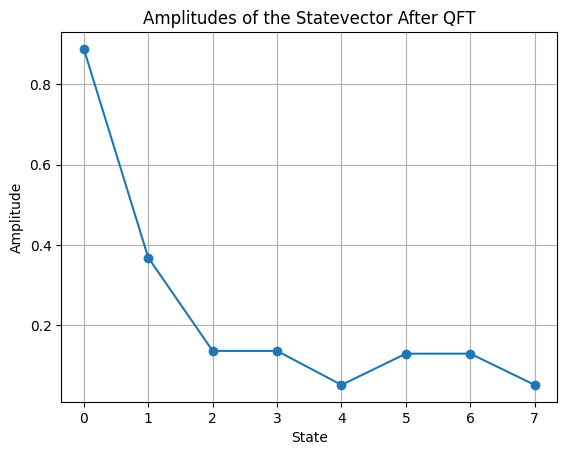

In [3]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Function to apply the Quantum Fourier Transform
def apply_qft(circuit, n):
    """Applies QFT on the first n qubits in circuit"""
    # Apply Hadamard gate to each qubit to create a superposition
    for j in range(n):
        circuit.h(j)
        # Apply controlled phase gates to create the QFT state
        for k in range(j+1, n):
            circuit.cp(np.pi/2**(k-j), k, j)
    # Swap the qubits to reverse the order for the final result
    for j in range(n//2):
        circuit.swap(j, n-j-1)
    return circuit

# Number of qubits and samples
num_qubits = 3
num_samples = 2**num_qubits

# Sample the sin function at discrete intervals
x_values = np.linspace(0, 2*np.pi, num_samples, endpoint=False)
samples = np.sin(x_values)

# Plot the sampled sine function
plt.plot(x_values, samples, 'o-')
plt.title('Sampled Sine Function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.show()

# Normalize the samples to be used as probabilities
normalized_samples = samples - min(samples)
normalized_samples /= max(normalized_samples)
probabilities = np.sqrt(normalized_samples)

# Create a Quantum Circuit acting on a quantum register of num_qubits qubits
qc = QuantumCircuit(num_qubits)

# Initialize the circuit with the sampled sine wave
# The amplitudes of the quantum state are set to the square root of the normalized samples
initial_state = np.zeros(num_samples)
for i, amplitude in enumerate(probabilities):
    initial_state[i] = amplitude
initial_state /= np.linalg.norm(initial_state)  # Normalize the state vector

# Initialize the quantum circuit with the state representing the sampled sine wave
qc.initialize(initial_state, range(num_qubits))

# Apply the Quantum Fourier Transform to the initialized state
apply_qft(qc, num_qubits)

# Use the statevector simulator backend to simulate the quantum circuit
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit on the statevector simulator
job = execute(qc, backend)

# Get the results from the job
result = job.result().get_statevector(qc)

# Print the statevector result
print(result)

# Draw the circuit for visualization
qc.draw('mpl')

# Plot the statevector amplitudes after applying the QFT
# This shows the frequency components of the sampled sine function
plt.plot(np.abs(result), 'o-')
plt.title('Amplitudes of the Statevector After QFT')
plt.xlabel('State')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


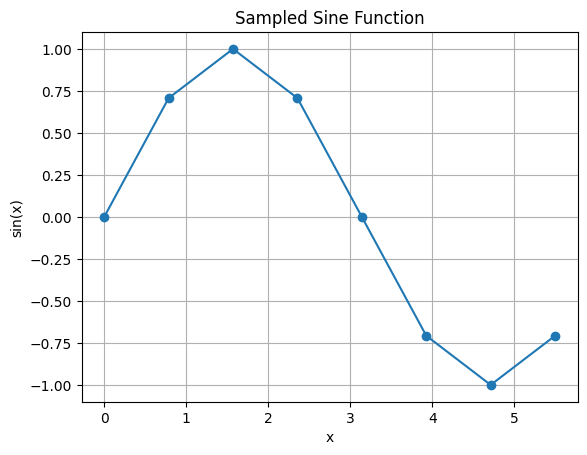

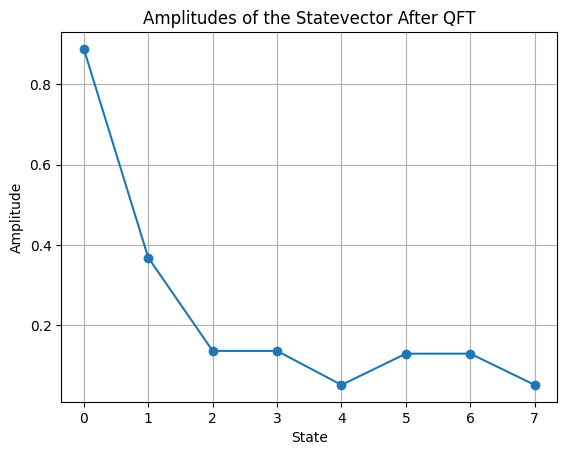

Estimated frequency: 0.0 cycles/sample interval
Estimated period: inf sample intervals/cycle
Estimated period in terms of x: inf radians


/tmp/ipykernel_60/3125000812.py:83: RuntimeWarning: divide by zero encountered in double_scalars
  period = 1 / frequency


In [4]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Function to apply the Quantum Fourier Transform
def apply_qft(circuit, n):
    """Applies QFT on the first n qubits in circuit"""
    for j in range(n):
        circuit.h(j)
        for k in range(j+1, n):
            circuit.cp(np.pi/2**(k-j), k, j)
    for j in range(n//2):
        circuit.swap(j, n-j-1)
    return circuit

# Number of qubits and samples
num_qubits = 3
num_samples = 2**num_qubits

# Sample the sin function at discrete intervals
x_values = np.linspace(0, 2*np.pi, num_samples, endpoint=False)
samples = np.sin(x_values)

# Plot the sampled sine function
plt.plot(x_values, samples, 'o-')
plt.title('Sampled Sine Function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.show()

# Normalize the samples to be used as probabilities
normalized_samples = samples - min(samples)
normalized_samples /= max(normalized_samples)
probabilities = np.sqrt(normalized_samples)

# Create a Quantum Circuit acting on a quantum register of num_qubits qubits
qc = QuantumCircuit(num_qubits)

# Initialize the circuit with the sampled sine wave
initial_state = np.zeros(num_samples)
for i, amplitude in enumerate(probabilities):
    initial_state[i] = amplitude
initial_state /= np.linalg.norm(initial_state)  # Normalize the state vector

qc.initialize(initial_state, range(num_qubits))

# Apply the Quantum Fourier Transform to the initialized state
apply_qft(qc, num_qubits)

# Use the statevector simulator backend to simulate the quantum circuit
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit on the statevector simulator
job = execute(qc, backend)

# Get the results from the job
result = job.result().get_statevector(qc)

# Draw the circuit for visualization
qc.draw('mpl')

# Plot the statevector amplitudes after applying the QFT
statevector_amplitudes = np.abs(result)
plt.plot(statevector_amplitudes, 'o-')
plt.title('Amplitudes of the Statevector After QFT')
plt.xlabel('State')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Find the index of the maximum amplitude in the statevector
# This corresponds to the dominant frequency component
peak_index = np.argmax(statevector_amplitudes)

# Estimate the frequency from the peak index
# The frequency unit is cycles/sample_interval
frequency = peak_index / num_samples

# Estimate the period of the sine wave
# The period unit is sample_intervals/cycle
period = 1 / frequency

# Convert the period to the corresponding x value range (2*pi in this case)
# This assumes that the sampling was done over one full period of the sine wave
period_in_x = period * (2 * np.pi)

print(f"Estimated frequency: {frequency} cycles/sample interval")
print(f"Estimated period: {period} sample intervals/cycle")
print(f"Estimated period in terms of x: {period_in_x} radians")
